![](https://images.hellogiggles.com/uploads/2018/08/09140304/picture-of-books-about-books-photo.jpg)

### Importing Important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading CSV file**

In [2]:
#Read the data 
books=pd.read_csv("C:/Users/JasJap/OneDrive/Desktop/KGJ_Minor/BX-Books.csv", sep = ';', error_bad_lines = False, encoding = 'latin-1')
print(f"Dataset shape : {books.shape}")
books.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


Dataset shape : (271360, 8)


C:\Users\JasJap\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


we can see that image URLs columns do not seem to be required for analysis, and hence these can be dropped off.

In [3]:
df_book=books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1)
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [4]:
df_book.info() #check the data types for each of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [5]:
df_book.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0316876712,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [6]:
df_book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

Here one value in "Book-Author" and two values in "Publisher" are Null values. So we can eliminate or drop the corresponding row as given below:

#### Checking for Duplicate rows

In [7]:
duplicate_book = df_book.duplicated()
print(duplicate_book.sum())

0


### Year-Of-Publication

In [8]:
df_book['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

There are some incorrect entries in yearOfPublication. It looks like publisher names ‘DK Publishing Inc’ and ‘Gallimard’ have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file. Also, some of the values are strings and same years have been entered as numbers at some places. We will make necessary correction for these rows and set the data type for yearOfPublication as int.


In [9]:
df_book.loc[df_book['Year-Of-Publication'] == 'DK Publishing Inc', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [10]:
df_book.loc[df_book['ISBN']=='078946697X','Year-Of-Publication']=2000
df_book.loc[df_book['ISBN']=='078946697X','Book-Author']="Michael Teitelbaum"
df_book.loc[df_book['ISBN']=='078946697X','Publisher']='DK Publishing Inc'
df_book.loc[df_book['ISBN']=='078946697X','Book-Title']="DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [11]:
df_book.loc[df_book['ISBN']=='0789466953','Year-Of-Publication']=2000
df_book.loc[df_book['ISBN']=='0789466953','Book-Author']="James Buckley"
df_book.loc[df_book['ISBN']=='0789466953','Publisher']='DK Publishing Inc'
df_book.loc[df_book['ISBN']=='0789466953','Book-Title']="DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [12]:
df_book.loc[df_book['Year-Of-Publication'] == 'Gallimard' ,:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [13]:
df_book.loc[df_book['ISBN']=='2070426769','Year-Of-Publication']=2003
df_book.loc[df_book['ISBN']=='2070426769','Book-Author']="Jean-Marie Gustave Le ClÃ?Â©zio"
df_book.loc[df_book['ISBN']=='2070426769','Publisher']='Gallimard'
df_book.loc[df_book['ISBN']=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

In [14]:
df_book['Year-Of-Publication'] = pd.to_numeric(df_book['Year-Of-Publication'],errors='coerce')
print(sorted(df_book['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


It can now be seen that yearOfPublication is of type int and it has values ranging from 0–2050. As this dataset was built in 2004, I am assuming all the years after 2006 are invalid keeping a margin of two years in case dataset may have been updated. For all the invalid entries (including 0), I will convert these to NaNs, and then replace them with mean values of remaining years.


In [15]:
df_book.loc[(df_book['Year-Of-Publication'] > 2006) | df_book['Year-Of-Publication']==0 ,'Year-Of-Publication'] = np.NAN
df_book['Year-Of-Publication'].fillna(round(df_book['Year-Of-Publication'].mean()),inplace=True)
df_book['Year-Of-Publication']=df_book['Year-Of-Publication'].astype(np.int32)

In [16]:
df_book['Year-Of-Publication'].describe()

count    271360.000000
mean       1993.695132
std           8.254750
min        1376.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

## publisher

Coming to ‘publisher’ column, I have handled two NaN values by replacing them with ‘other’

In [17]:
df_book.loc[df_book['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [18]:
df_book.loc[df_book['ISBN']=='193169656X', 'Publisher'] = 'other'
df_book.loc[df_book['ISBN']=='1931696993', 'Publisher'] = 'other'

## Users Dataset

In [20]:
users = pd.read_csv("C:/Users/JasJap/OneDrive/Desktop/KGJ_Minor/BX-Users.csv", sep = ';', error_bad_lines = False, encoding = 'latin-1')
print(f"Dataset shape : {users.shape}")
users.head()

Dataset shape : (278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [22]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [23]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Upon checking the unique values, User-ID looks correct. However, Age column has a NaN and some very high values. In my view ages below 5 and above 90 do not make much sense, and hence, these are being replaced with NaNs. All the NaNs are then replaced with mean value of Age, and its data type is set as int.

In [24]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [25]:
users.loc[(users['Age']>90) | (users['Age']<5),'Age'] = np.nan
users['Age']=users['Age'].fillna(users['Age'].mean())
users['Age']=users['Age'].astype(np.int32)

In [27]:
print(sorted(users['Age'].unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Ratings Dataset

In [28]:
book_rating = pd.read_csv("C:/Users/JasJap/OneDrive/Desktop/KGJ_Minor/BX-Book-Ratings.csv", sep = ';', error_bad_lines = False, encoding = 'latin-1')
print(f"Dataset shape : {book_rating.shape}")
book_rating.head()

Dataset shape : (1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


We observe that our user-book ratings matrix will be very sparse as actual ratings are quite less as compared to size of ratings matrix (number of users × number of books).

In [29]:
n_users=users.shape[0]
n_books=df_book.shape[0]
print(n_users * n_books)

75670906880


*ratings dataset have userID and ISBN which also exist in users and books table.*

In [42]:
ratings_new = book_rating[book_rating['ISBN'].isin(df_book['ISBN'])] 
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]

In [43]:
print(book_rating.shape)
print(ratings_new.shape)

(1149780, 3)
(1031136, 3)


It is evident that, users have rated some of the books, which are not part of original books dataset. Sparsity of the dataset can be calculated as below:

In [44]:
sparsity=1.0-len(ratings_new)/float(n_users * n_books)
print("The sparsity level of Book Crossing dataset is "+ str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99863734155898 %


#### The explicit ratings represented by 1–10 and implicit ratings represented by 0 will have to be segregated now. We will be using only explicit ratings for building our book recommendation system. Similarly, users are also segregated into those who rated explicitly and those whose implicit behavior was recorded.

In [45]:
book_rating['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [46]:
rating_exp = ratings_new[ratings_new['Book-Rating']!=0]
rating_imp = ratings_new[ratings_new['Book-Rating']==0]

In [47]:
users_exp_rating = users[users['User-ID'].isin(rating_exp['User-ID'])]
users_imp_rating = users[users['User-ID'].isin(rating_imp['User-ID'])]

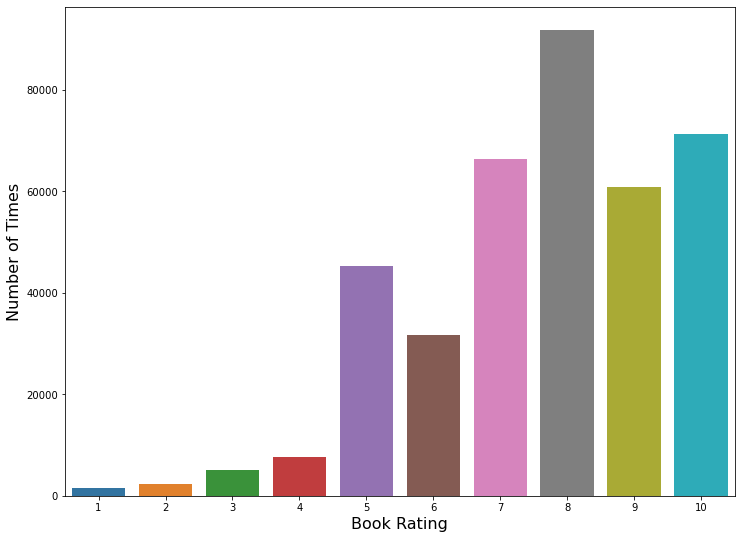

In [57]:
plt.figure(figsize=(12,9))
sns.countplot(data=rating_exp, x='Book-Rating')
plt.ylabel('Number of Times',fontsize=16)
plt.xlabel('Book Rating',fontsize=16)
plt.show()

#### A countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times.